***We will build a multimodal image captioning model that can take an image as input and output a text caption***

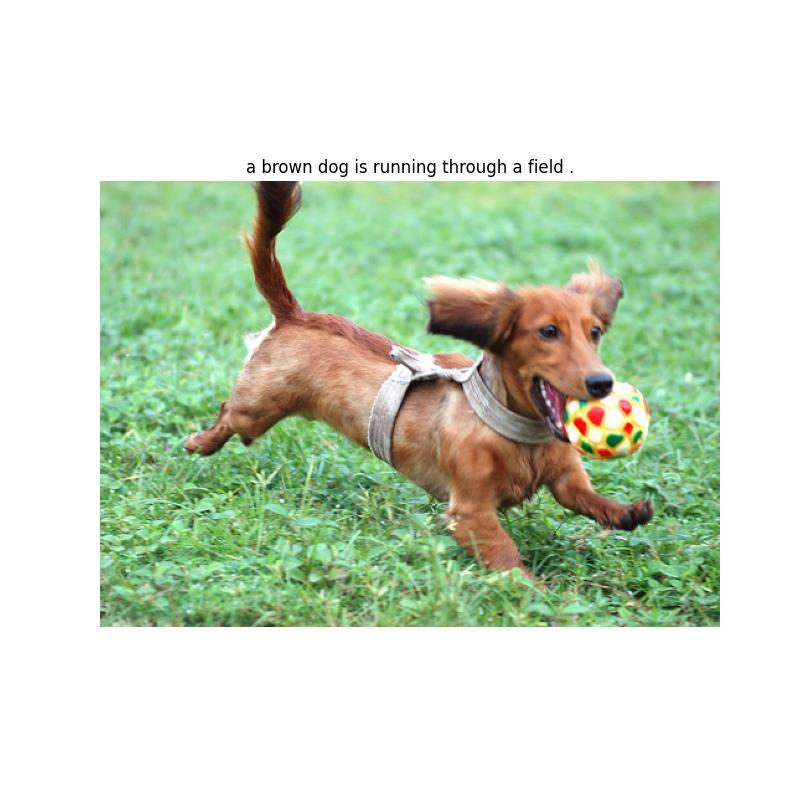


**This notebook will go over:**

- The NLTK (Natural Language Tool Kit) Library
  - Tokenization
  - Word Distributions

- The Machine Learning Pipeline
  - 🟦Importing
  - 🟧Data Preprocessing
  - 🟩Multimodal AI Building
  - 🟥Training
  - 🟪Testing


---

<br>

**Guide to completing this project:**
- Codes (🟦🟧🟩🟥🟪) indicate where in the notebook / ML pipeline you are in
- Sections labeled with (⌛) may take longer amounts of time to code
- Use the .ipynb section to code, with .py sections showing the code without the notebook format

Good luck!
Start by scrolling down.

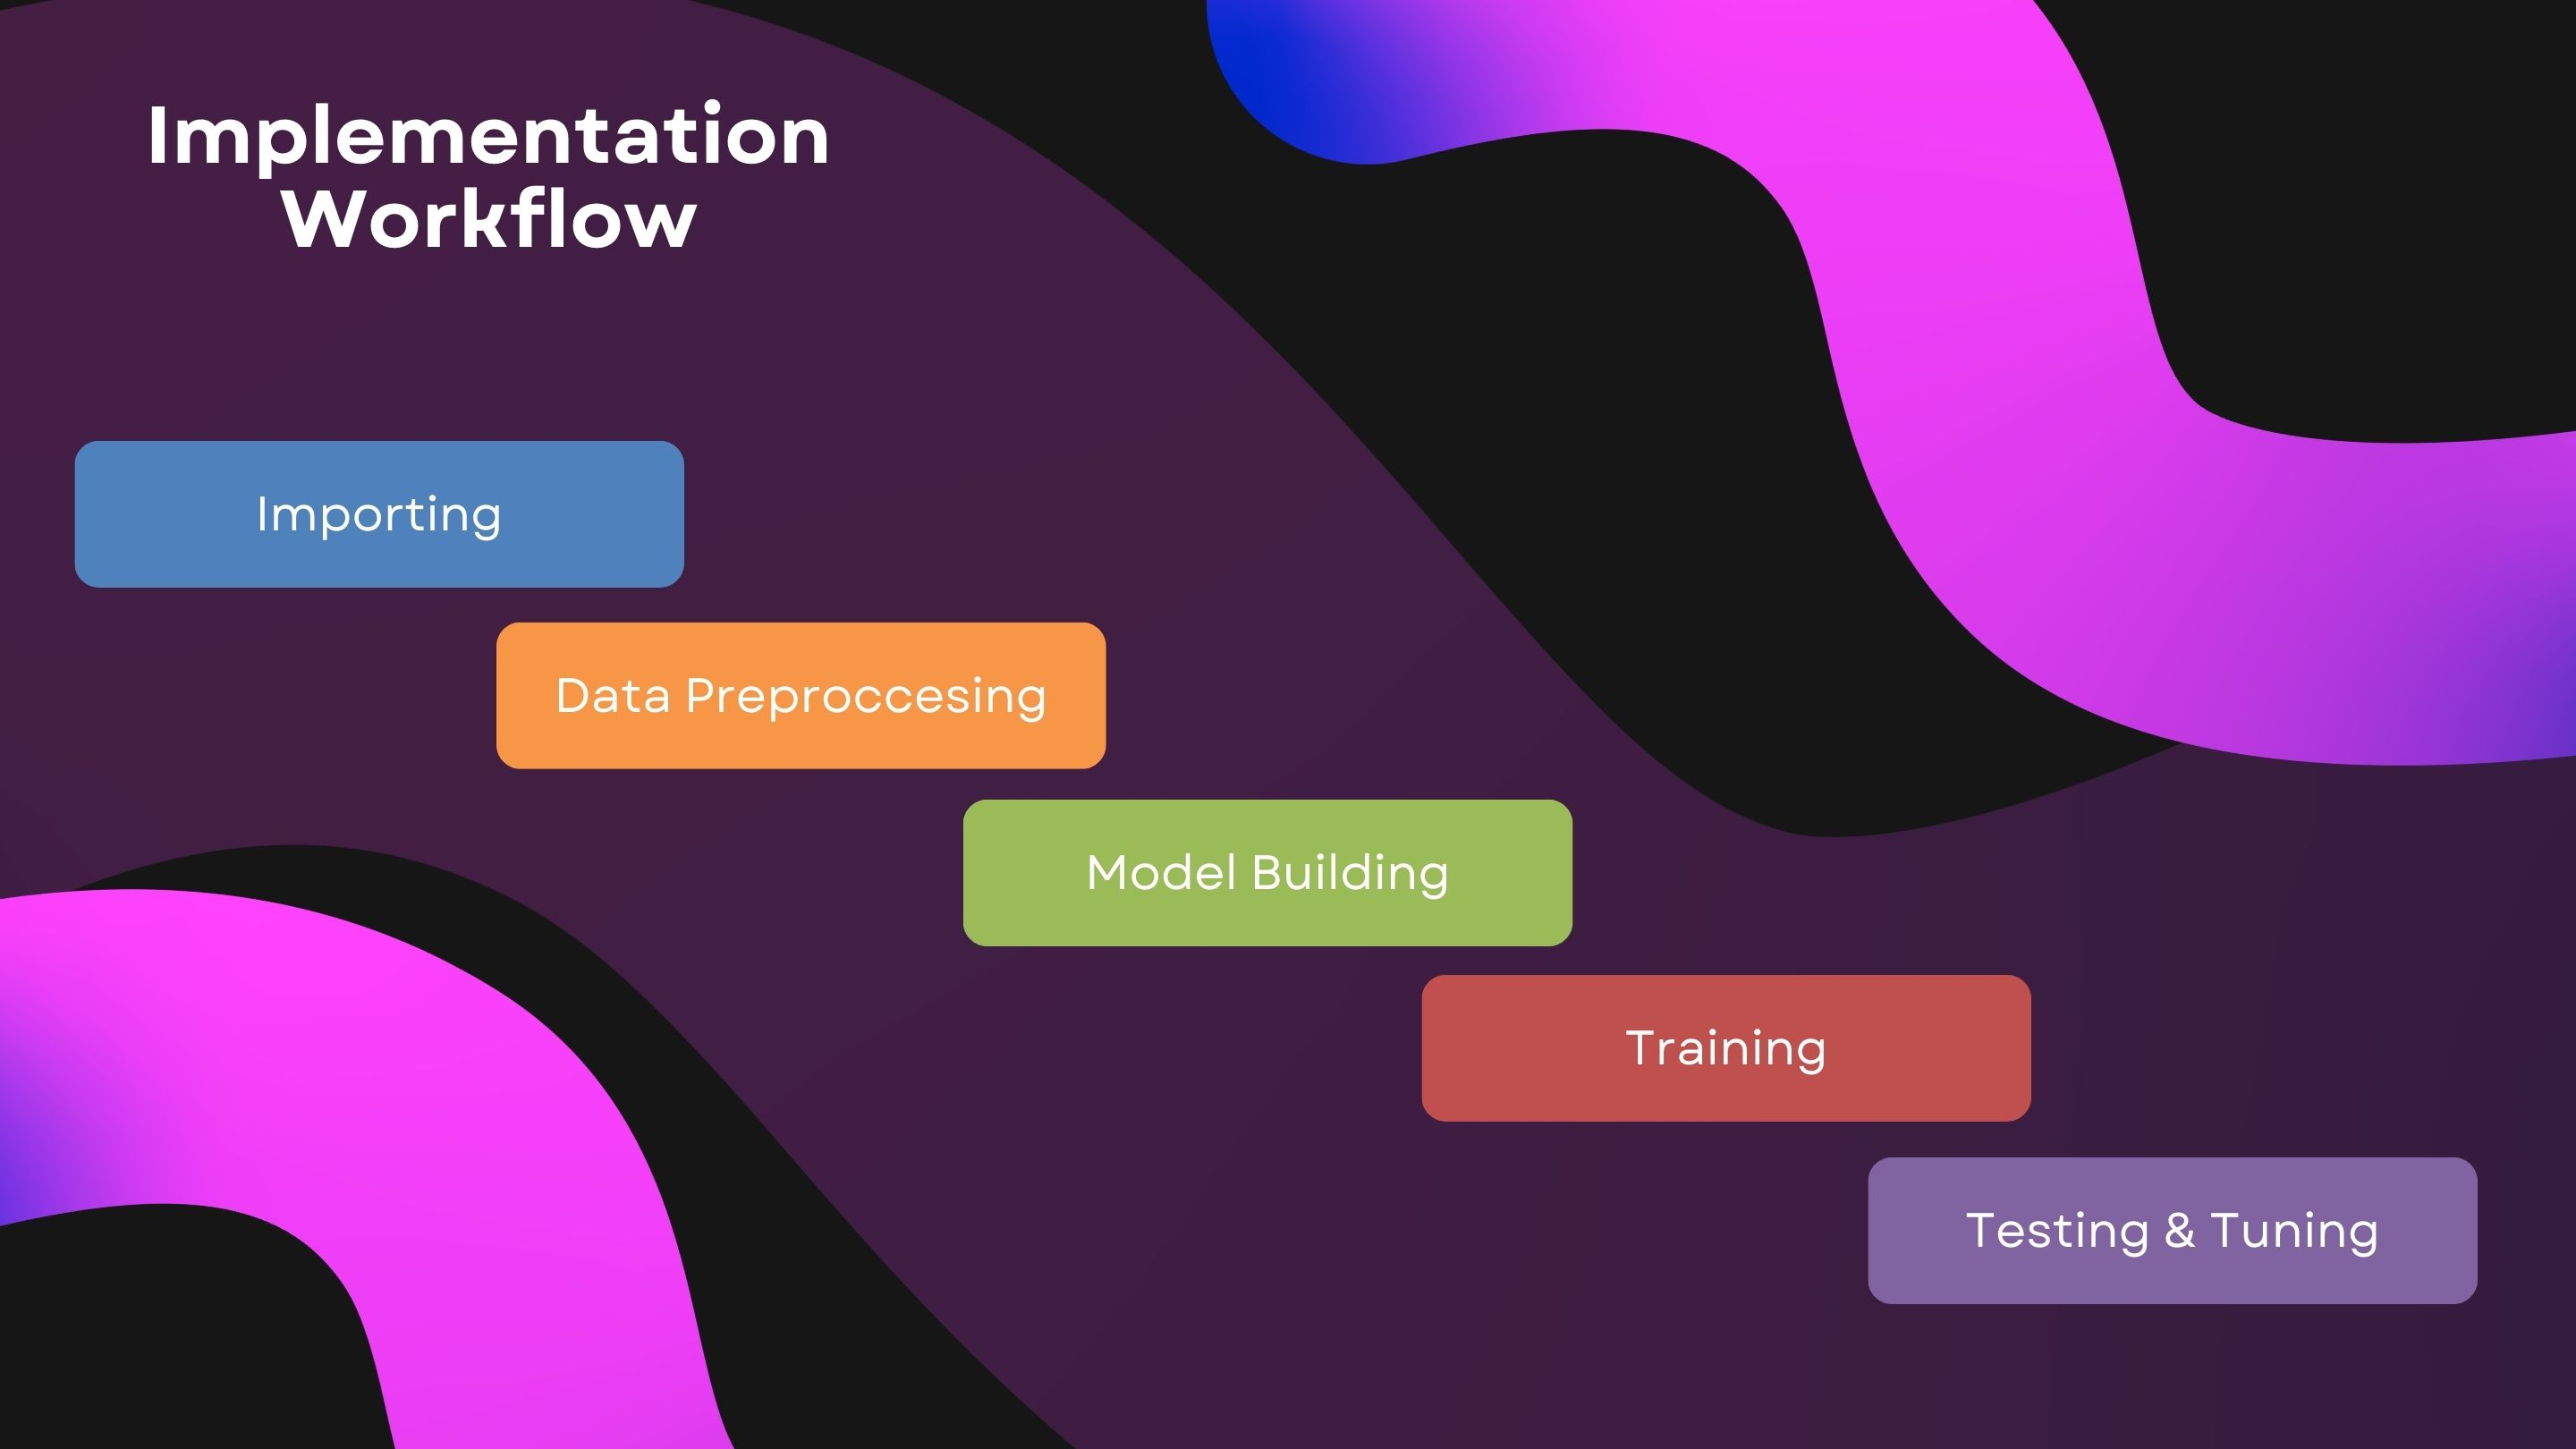

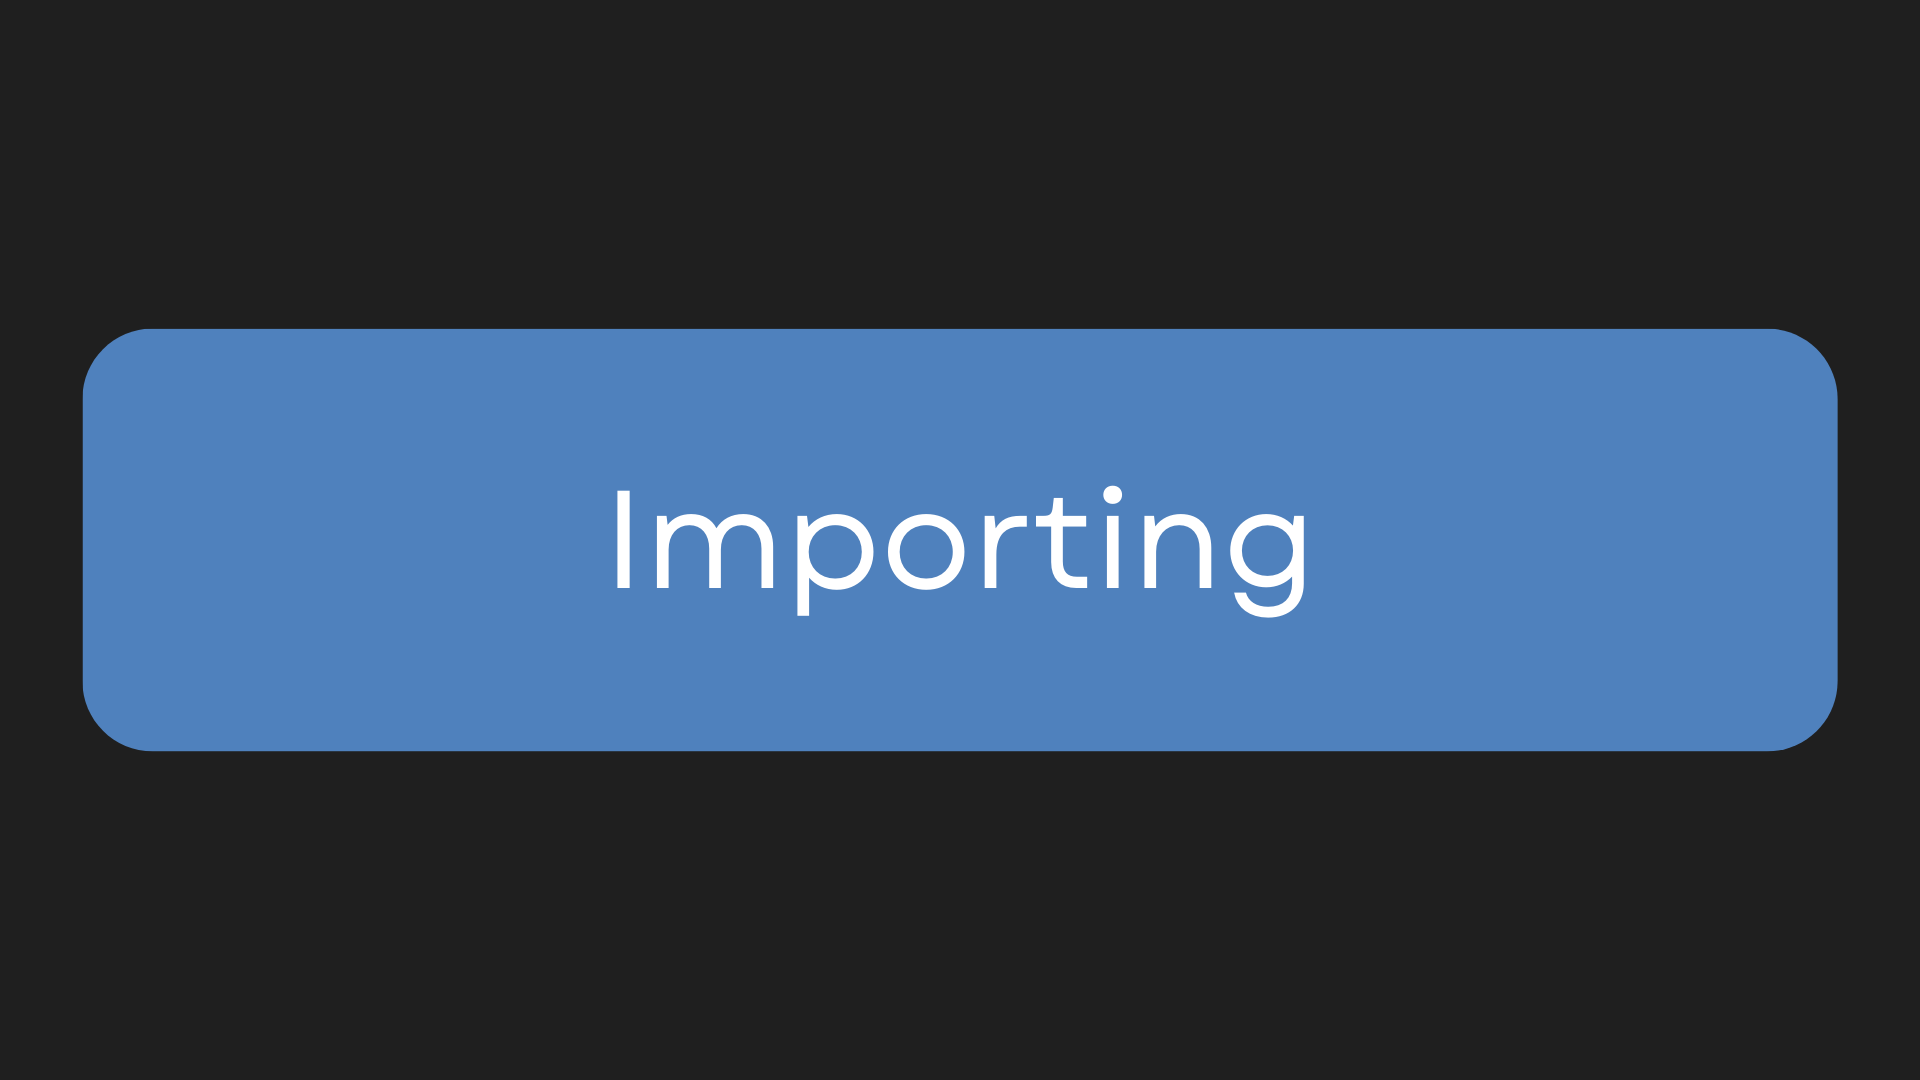

First, lets start to create our Multimodal AI. In addition to all our regular imports, import `Image` from `PIL`.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import kagglehub

Import `kagglehub` so the following code below works. Use `kagglehub`'s `.dataset_download()` method to download this dataset:

`"adityajn105/flickr8k"`


In [3]:
#CODE HERE
path=kagglehub.dataset_download("adityajn105/flickr8k")

100%|██████████| 1.04G/1.04G [00:11<00:00, 97.4MB/s]

Extracting files...


In [4]:
print(os.listdir(path))

['captions.txt', 'Images']


In [5]:
import os
import shutil

# Create destination folder
os.makedirs("data/images", exist_ok=True)

# Move all images
for file in os.listdir(f"{path}/Images"):
    shutil.move(f"{path}/Images/{file}", f"data/images/{file}")

# Move captions file
shutil.move(f"{path}/captions.txt", "data/text.csv")

'data/text.csv'

Important note: The images and texts are not ordered the same

We need to convert this image path from a string to a PIL image. Use `Image.open()` method to store the image a variable called `image`. This is the path for an image:

`os.path.join("./data/images/",image_path)`

In [6]:
print(len(os.listdir("data/images")))

8091


Show all information about the picture using the code below

In [11]:
test_image_path = "data/images/98377566_e4674d1ebd.jpg"
image = Image.open(test_image_path)
image_array = np.array(image)

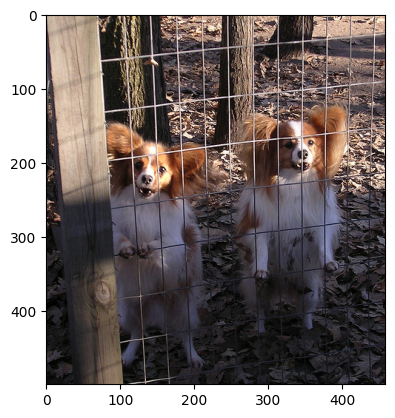

In [12]:
#Visualize the Image!
# CODE HERE
plt.imshow(image_array)

The function below can help us obtain the default captions that come with our image. Test around with seeing the captions of different images.

In [10]:
caption_path = "data/text.csv"
print(caption_path)

with open(caption_path, 'r') as f:
    contents = f.read()
    captions = contents

print(captions)

data/text.csv
image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .
1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .
1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .
1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .
1002674143_1b742ab4b8.jpg,A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
1002674

In [14]:
def get_captions_for_image(image_filename):
    captions_df = pd.read_csv(caption_path)

    image_captions = captions_df[captions_df['image'] == image_filename]

    # Return all captions for this image
    return image_captions['caption'].tolist()

# Example usage
captions = get_captions_for_image("98377566_e4674d1ebd.jpg")

# Print all captions
print(f"Found {len(captions)} captions for image {test_image_path}:")

for i, caption in enumerate(captions, 1):
    print(f"Caption {i}: {caption}")

Found 5 captions for image data/images/98377566_e4674d1ebd.jpg:
Caption 1: Two brown and white dogs lift their ears and look through a fence .
Caption 2: Two little dogs looking out of their cage .
Caption 3: Two small dogs are in a cage outside .
Caption 4: Two small dogs in a cage .
Caption 5: Two white and brown dogs up against a fence .
